In [212]:
import pandas as pd

In [213]:
import matplotlib.pyplot as plt

In [214]:
video_games=pd.read_csv("DATAFrames/video_games_sales.csv")

In [215]:
video_games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [216]:
#looking for NaN or any values other then a year
video_games["year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [217]:
#Let's change the FLOAT in the year column for a INT to make it look cleaner
video_games["year"]=pd.to_datetime(video_games["year"])
video_games["year"]=pd.to_numeric(video_games["year"])

In [218]:
video_games["year"]

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: year, Length: 16598, dtype: int64

In [219]:
#Let's change the the following column title since it is not very clear that the numbers in the data is in millions of copies
video_games["na_sales(million_copies)"]=video_games["na_sales"]
video_games["eu_sales(million_copies)"]=video_games["eu_sales"]
video_games["jp_sales(million_copies)"]=video_games["jp_sales"]
video_games["other_sales(million_copies)"]=video_games["other_sales"]

In [220]:
video_games.drop(labels=["na_sales","eu_sales","jp_sales","other_sales"], axis=1)

,rank,name,platform,year,genre,publisher,global_sales,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies)
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.01,0.00,0.00,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.01,0.00,0.00,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.01,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.01,0.00,0.01,0.00,0.00


In [221]:
#let's find all the mario games considering that all mario games name contains "Mario"
mario_games=video_games[video_games["name"].str.contains("Mario")]

In [222]:
mario_games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies)
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,15.85,12.88,3.79,3.31
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,11.38,9.23,6.50,2.90
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,14.59,7.06,4.70,2.26
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,9.81,7.57,4.13,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06,0.00,0.00,0.05,0.00
13273,13275,Detective Conan: Marionette Symphony,3DS,2013,Adventure,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05,0.00,0.00,0.05,0.00
15261,15264,Mario Tennis,3DS,-9223372036854775808,Sports,NaN,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.02,0.00
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00


In [223]:
#With all mario games found, we divide them into the different platforms and make the sum of the sales across the different locations
plat_reg_sales=mario_games.groupby("platform").agg({"na_sales(million_copies)":"sum","eu_sales(million_copies)":"sum","jp_sales(million_copies)":"sum","other_sales(million_copies)":"sum"})

In [224]:
plat_reg_sales

,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies)
platform,,,,
2600,1.48,0.09,0.00,0.02
3DS,16.75,13.10,10.66,2.90
DS,39.98,27.07,17.01,8.16
GB,25.56,8.17,11.96,1.34
GBA,17.80,6.84,7.62,1.11
GC,17.50,5.21,6.12,0.80
N64,18.03,6.45,9.40,0.57
NES,47.14,8.92,17.15,1.54
SNES,26.05,8.29,14.29,1.21


In [225]:
#Browsing through the different plot styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

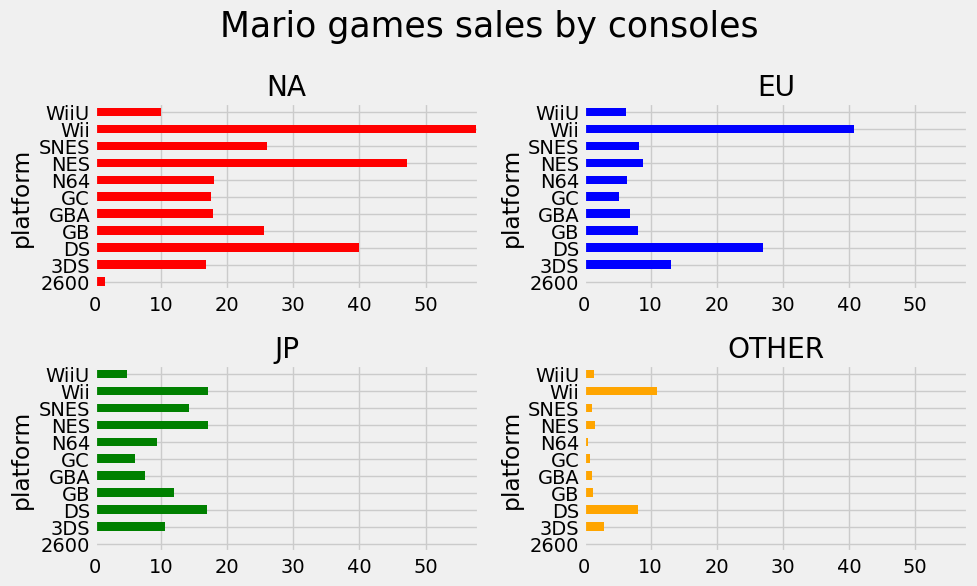

In [227]:
#Making the plot showing mario games sales on different consoles
plt.figure(figsize=(10,6))
plt.suptitle("Mario games sales by consoles", fontsize=25)
plt.tight_layout(pad=4)
plt.subplot(2,2,1)
plat_reg_sales["na_sales(million_copies)"].plot(kind="barh",title="NA", color="red")
plt.xlim(0,58)
plt.subplot(2,2,2)
plat_reg_sales["eu_sales(million_copies)"].plot(kind="barh",title="EU",color="blue")
plt.xlim(0,58)
plt.subplot(2,2,3)
plat_reg_sales["jp_sales(million_copies)"].plot(kind="barh",title="JP",color="green")
plt.xlim(0,58)
plt.subplot(2,2,4)
plat_reg_sales["other_sales(million_copies)"].plot(kind="barh",title="OTHER",color="orange")
plt.xlim(0,58)
plt.tight_layout()

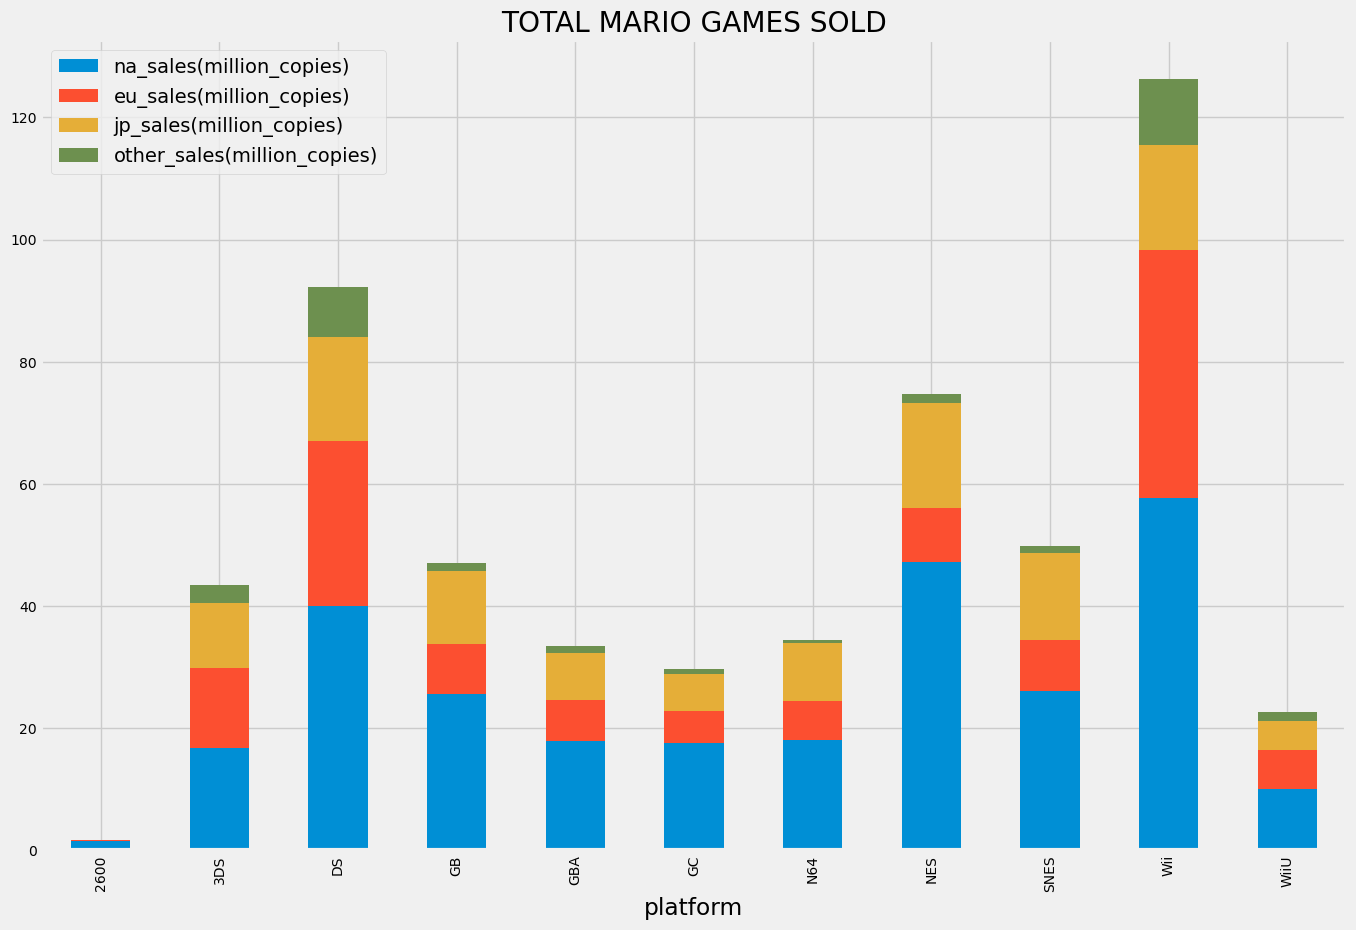

In [228]:
#Making a plot showing the same results but with a different visual representation
fig,ax=plt.subplots(figsize=(15,10))
plat_reg_sales.plot(kind="bar",ax=ax, stacked=True,title="TOTAL MARIO GAMES SOLD", fontsize=10)
plt.show()

In [229]:
import seaborn as sns

In [230]:
#make the same thing with pokemon games considering pokemon games name contains "pokemon"
pokemon_games=video_games[video_games["name"].str.contains("Pokemon")]

In [231]:
pokemon_games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies)
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11.27,8.89,10.22,1.00
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,9.00,6.18,7.20,0.71
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,6.42,4.52,6.04,1.37
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,6.06,3.90,5.38,0.50
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,5.57,3.28,5.65,0.82
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,5.17,4.05,4.34,0.79
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,4.40,2.77,3.96,0.77
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,4.23,3.37,3.08,0.65
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,4.34,2.65,3.15,0.35
81,82,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33,2.91,1.86,3.14,0.43


In [232]:
#Sum of the global pokemon games sales through the years
sales_poke=pokemon_games.groupby("year")["global_sales"].sum().sort_index()

In [233]:
sales_poke

year
1996    31.37
1999    37.49
2000     0.45
2001     0.89
2002    15.85
2003     2.22
2004    11.26
2005     3.91
2006    22.15
2007     4.96
2008     2.30
2009    13.48
2010    16.65
2011     1.43
2012    10.65
2013    14.35
2014    11.82
2015     1.28
Name: global_sales, dtype: float64

In [234]:
#Sum of the global Mario games sales through the years
sales_mario=mario_games.groupby("year")["global_sales"].sum().sort_index()

In [235]:
sales_mario

year
-9223372036854775808     0.02
 1982                    1.59
 1983                    2.28
 1985                   40.24
 1986                    2.65
 1988                   24.74
 1989                   23.48
 1990                   25.46
 1992                   22.69
 1993                   11.04
 1994                    5.19
 1995                    5.15
 1996                   23.90
 1998                    2.70
 1999                    9.35
 2000                    6.79
 2001                   16.84
 2002                   11.69
 2003                   17.93
 2004                   20.34
 2005                   31.76
 2006                   32.83
 2007                   43.40
 2008                   42.89
 2009                   42.03
 2010                   15.16
 2011                   26.78
 2012                   22.73
 2013                    9.01
 2014                    7.44
 2015                    6.46
 2016                    0.72
Name: global_sales, dtype: float64

In [236]:
#Join the 2 series together using join="inner" to have all the overlaspe years where both games were on sale
poke_mario=pd.concat([sales_poke,sales_mario],axis=1, join="inner",keys=["Pokemon","Mario"])

In [237]:
poke_mario

,Pokemon,Mario
year,,
1996,31.37,23.90
1999,37.49,9.35
2000,0.45,6.79
2001,0.89,16.84
2002,15.85,11.69
2003,2.22,17.93
2004,11.26,20.34
2005,3.91,31.76
2006,22.15,32.83


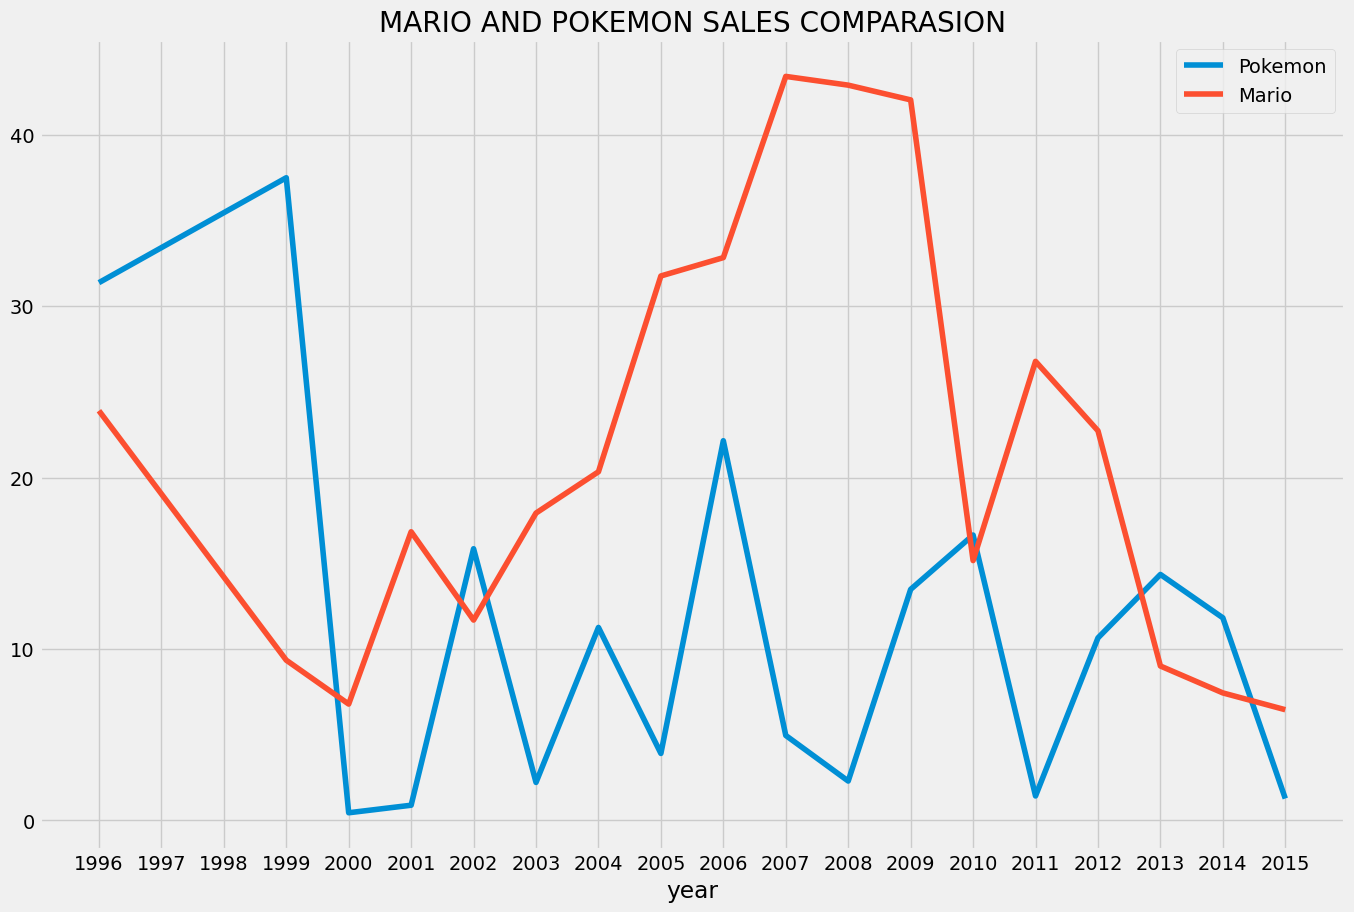

In [279]:
#Make a line plot showing pokemon vs mario sales from 1996 to 2015
fig,ax=plt.subplots(figsize=(15,10))
plt.xticks([1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
poke_mario.plot(kind="line",ax=ax, title="MARIO AND POKEMON SALES COMPARASION")
plt.show()

In [239]:
#finding the top 10 most sold games in the dataframe
video_games.nlargest(10,["global_sales"])

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies)
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11.27,8.89,10.22,1.00
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,23.20,2.26,4.22,0.58
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,11.38,9.23,6.50,2.90
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,14.03,9.20,2.93,2.85
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,14.59,7.06,4.70,2.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,26.93,0.63,0.28,0.47


In [315]:
#Creating a function that will show me every games sold by over 5m copies global
def Sales_category(sc):
    if sc > 5.00:
        return "High sales"
    else:
        return None

In [317]:
#Using the function created and creating a new column from it
video_games["sales_categories"]=video_games["global_sales"].apply(Sales_category)

In [319]:
video_games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales(million_copies),eu_sales(million_copies),jp_sales(million_copies),other_sales(million_copies),sales_categories
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,41.49,29.02,3.77,8.46,High sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,29.08,3.58,6.81,0.77,High sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,15.85,12.88,3.79,3.31,High sales
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.75,11.01,3.28,2.96,High sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,11.27,8.89,10.22,1.00,High sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,None
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,None
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,None
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,None


In [321]:
#Seperating the highly sold games from the reset and saving it to new DF
high_sales=video_games[video_games["sales_categories"]=="High sales"]

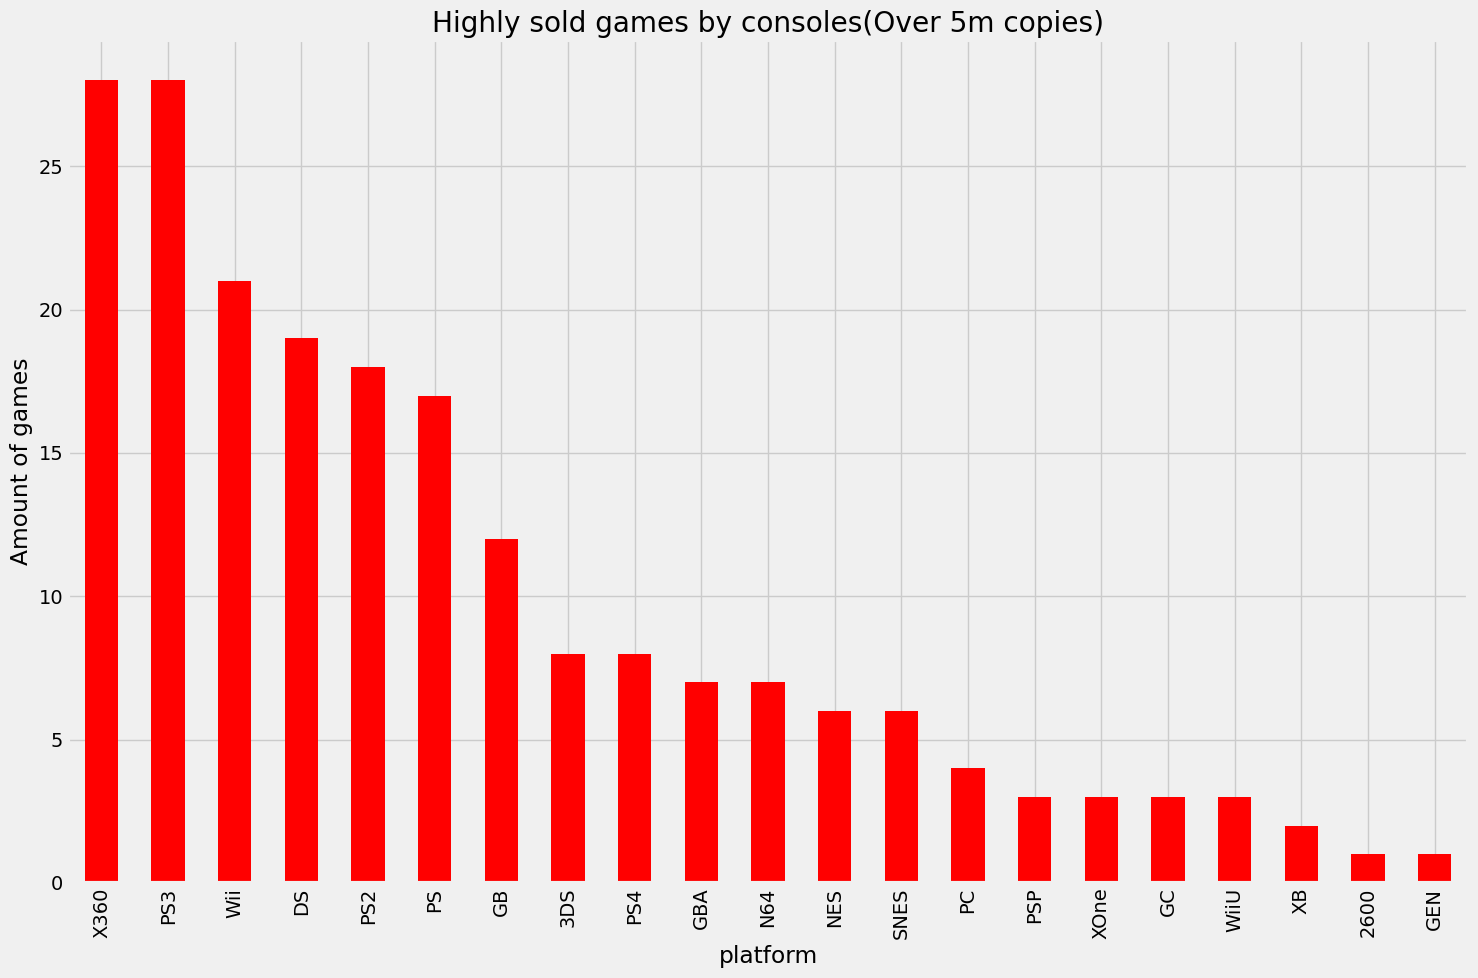

In [357]:
#Using new DF to make a plot showing which consoles had the most games sold for over 5m copies
fig,ax=plt.subplots(figsize=(15,10))
high_sales["platform"].value_counts().plot(ax=ax,kind="bar", title="Highly sold games by consoles(Over 5m copies)",ylabel="Amount of games",color="red")
plt.tight_layout()
plt.show()

In [345]:
#Give a variable to the data used for the grap above
amount_games=high_sales["platform"].value_counts()

In [383]:
#Finding the platforms from the plot above to retrieve new data from them and give it a variable
consoles_to_find=["X360","PS3","Wii","DS","PS2","PS","GB","3DS","PS4","GBA","N64","NES","SNES","PC","PSP","XOne","GC","WiiU","XB","2600","GEN"]
most_sold_platforms=video_games[video_games["platform"].isin(consoles_to_find)]

In [385]:
#With the new DF from above, finding the mean of the copies sold for every game within each platform and give it a variable
average_sales=most_sold_platforms.groupby("platform")["global_sales"].mean()

In [387]:
#Joining the 2 series created above to compare them
count_average=pd.concat([amount_games,average_sales],axis=1)

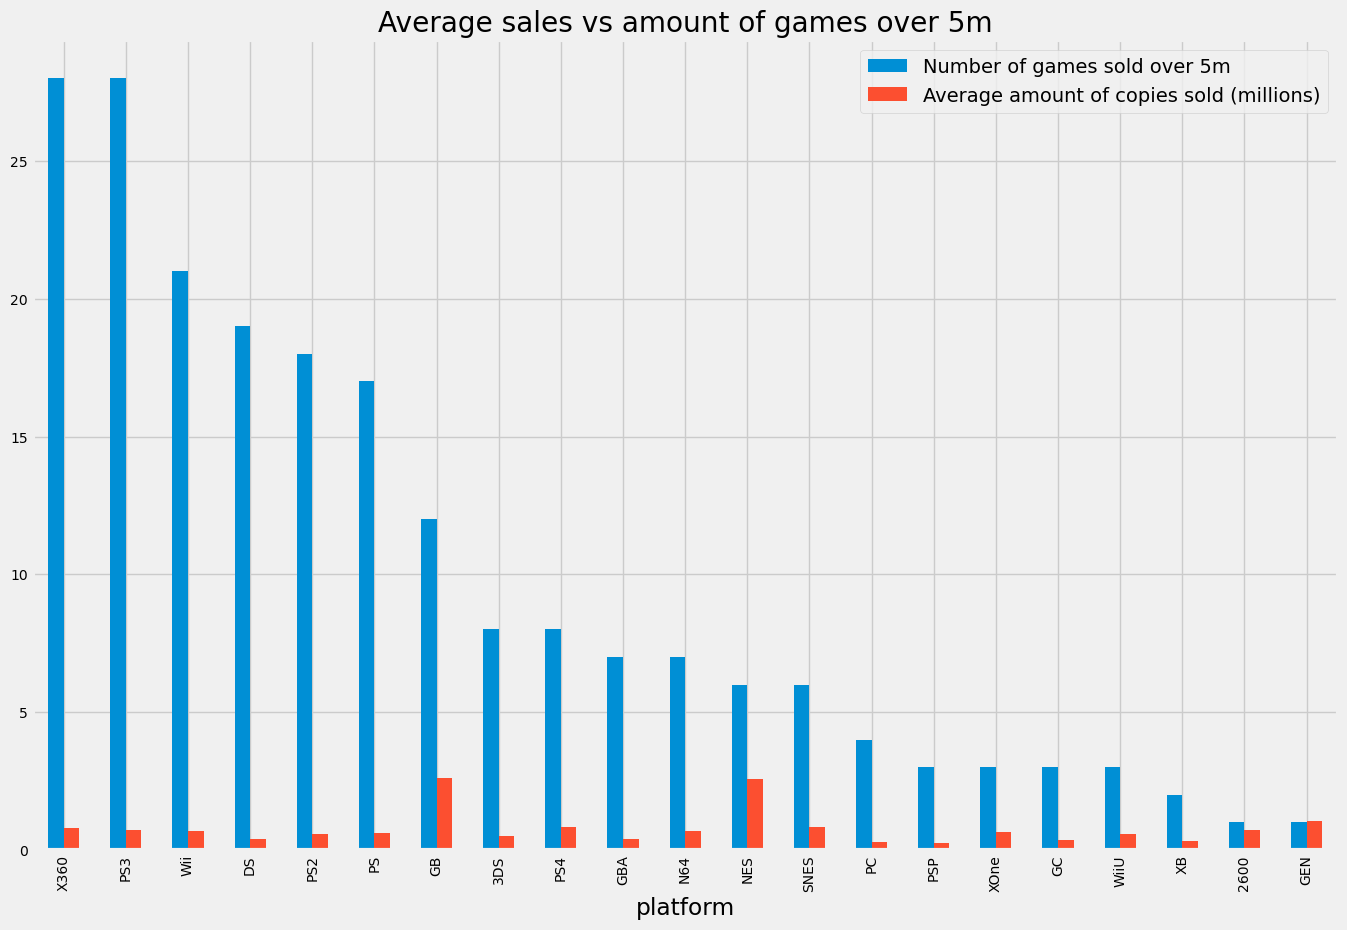

In [391]:
#Creating a plot to see the difference
fig,ax=plt.subplots(figsize=(15,10))
count_average.plot(kind="bar",ax=ax,title="Average sales vs amount of games over 5m", fontsize=10)
ax.legend(["Number of games sold over 5m","Average amount of copies sold (millions)"])
plt.show()

Does a platform having the most games sold for over 5m copies means it will also have the highest average amount of copies sold per games ? No, as we can see Xbox 360 is the platform with the most amount of games sold for over 5m copies but does no have the highest average, it has more games that sold poorly then the Gameboy or the NES for example.